# SPLEX-Project 2020-2021 : Frog Calls 
-------
## 🐸 Step 2 : Predictory and classifications analysis of dataset 🐸
#### *Adrien Leroy and Antoine Auvergne*

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

#### Key variables

In [26]:
dataset=pd.read_csv('../Anuran_Calls/Frogs_MFCCs.csv')
features=dataset.columns[1:-4]
labels=dataset.columns[-4:]
family,genus,species,id=labels

###  I. Random Forest __Independant__ 🌳 🌳 🌳

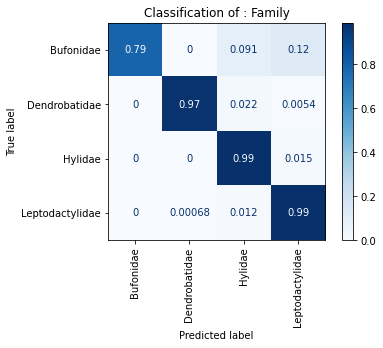

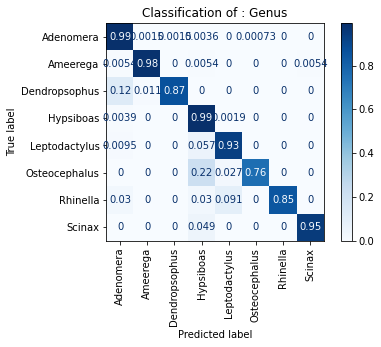

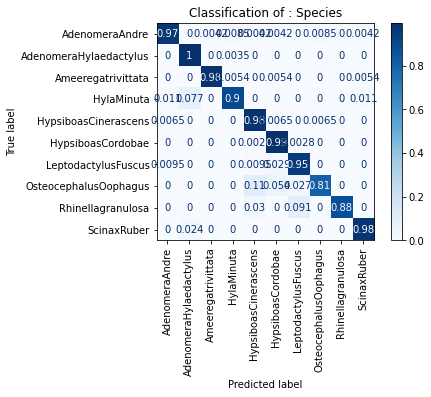

In [45]:
for label in labels[:-1]:
    x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                        dataset[label], 
                                                        test_size=0.33, 
                                                        random_state=42)

    Rfclf = RandomForestClassifier(random_state=0)
    Rfclf.fit(x_train, y_train)

    y_predicted=Rfclf.predict(x_test)
    
    

    
    confusion_matrix(y_test,y_predicted)
    disp=plot_confusion_matrix(Rfclf,x_test,y_test,cmap=plt.cm.Blues,
                                     normalize='true',labels=None,xticks_rotation="vertical")
    disp.ax_.set_title("Classification of : "+label)
    
plt.savefig("../images/confusionMatrixGeneral_"+str(label)+".png")


###  II. Random Forest __Hierarchical__

Our idea came from this inspirationnal drawing I made : 

                        🌳
                        / \
                       🌳 🌳
                       /\  /\
                      🌳🌳🌳🌳
                      
                      
> COLONNA, J. G.; GAMA, J.; NAKAMURA, E. F. 
[**Recognizing Family, Genus, and Species of Anuran Using a Hierarchical Classification Approach**](https://www.researchgate.net/publication/305335644_Recognizing_Family_Genus_and_Species_of_Anuran_Using_a_Hierarchical_Classification_Approach).
Lecture Notes in Computer Science. 995ed.: Springer International Publishing, 2016, v. 9956, p. 198-212.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[labels], 
                                                    test_size=0.33, 
                                                    random_state=42)


print("Classifying Families",'\n')
RfclfGeneral=RandomForestClassifier()
RfclfGeneral.fit(x_train,y_train[family])


RfclfFamiliesRF=[]
RfclFamiliesLabels=[]

RfclfGenusRF=[]
RfclfGenusLabels=[]

print("Classifying Genus : ",'\n')

for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    RfclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))
    
    RfclFamiliesLabels.append(label)
    RfclfFamiliesRF.append(RfclfTemp)
    
RfclfFamilies=dict(zip(RfclFamiliesLabels,RfclfFamiliesRF))

print("\nClassifying Species : ",'\n')

for label in np.unique(dataset[genus]):
    print("Classifying "+str(label))
    
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    RfclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
    
    RfclfGenusLabels.append(label)
    RfclfGenusRF.append(RfclfTemp)
    
RfclfGenus=dict(zip(RfclfGenusLabels,RfclfGenusRF))


Classifying Families 

Classifying Genus :  

Classifying Bufonidae
Classifying Dendrobatidae
Classifying Hylidae
Classifying Leptodactylidae

Classifying Species :  

Classifying Adenomera
Classifying Ameerega
Classifying Dendropsophus
Classifying Hypsiboas
Classifying Leptodactylus
Classifying Osteocephalus
Classifying Rhinella
Classifying Scinax


#### Predicting Results 🐸 

In [42]:
y_predicted=pd.DataFrame(columns=y_test.columns[:-1])
display(y_predicted)

,Family,Genus,Species


In [43]:
y_predicted[family]=RfclfGeneral.predict(x_test)

for label in np.unique(y_predicted[family]):
    
    x_testTemp=x_test[y_predicted[family]==label]
    x_testTempIndices=np.where(y_predicted[family]==label)[0]
    
    
    if type(RfclfFamilies[label])!=str:
        
        y_predictedGenusTemp=RfclfFamilies[label].predict(x_testTemp)
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
    else:

        y_predictedGenusTemp=[RfclfFamilies[label] for i in x_testTempIndices]
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
for sublabel in np.unique(y_predicted[genus]):

    x_testTemp=x_test[y_predicted[genus]==sublabel]
    x_testTempIndices=np.where(y_predicted[genus]==sublabel)[0]

    if type(RfclfGenus[sublabel])!=str:

        y_predictedSpecieTemp=RfclfGenus[sublabel].predict(x_testTemp)
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp

    else:

        y_predictedSpecieTemp=[RfclfGenus[sublabel] for i in x_testTempIndices]
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp
        

display(y_predicted)

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2370,Leptodactylidae,Adenomera,AdenomeraAndre
2371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2372,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2373,Hylidae,Hypsiboas,HypsiboasCordobae


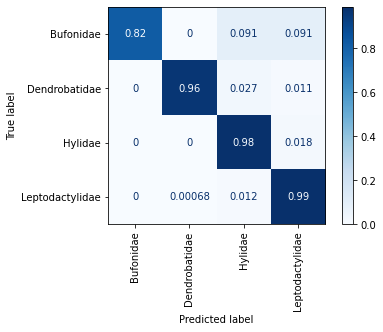

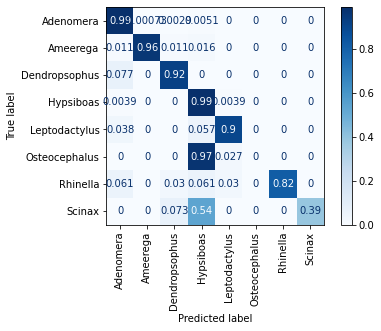

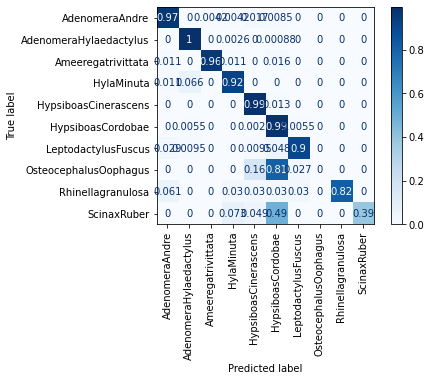

In [37]:
for label in labels[:-1]:
    
    cm=confusion_matrix(y_test[label],y_predicted[label],normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test[label]))
    disp = disp.plot(cmap=plt.cm.Blues,xticks_rotation="vertical")

In [38]:
cm=confusion_matrix(y_test[species],y_predicted[species])
somme=0
for i in range(len(cm)):
    for j in range(len(cm)):
        if i==j:
            somme+=cm[i][j]
print('Accuracy for Hierarchical clustering= ',somme/cm.sum())

Accuracy for Hierarchical clustering=  0.9532631578947368


In [39]:
flat_SVC=RandomForestClassifier()
scores=cross_val_score(flat_SVC,dataset[features],dataset[species],cv=20)
print("Accuracy with specie Clustering directly",scores.mean())

Accuracy with specie Clustering directly 0.9738714794181366


###  II. SVM Classifier Independant /৲¬ 📈 📈

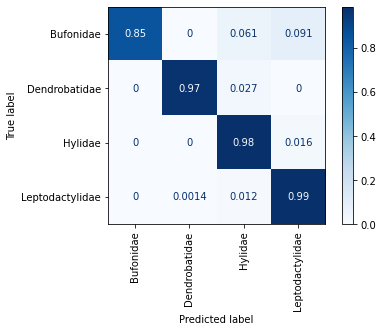

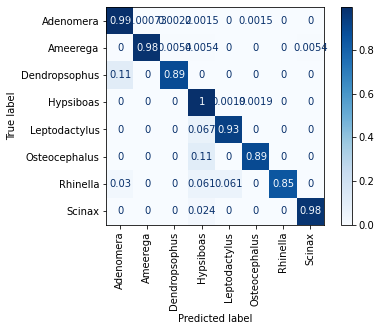

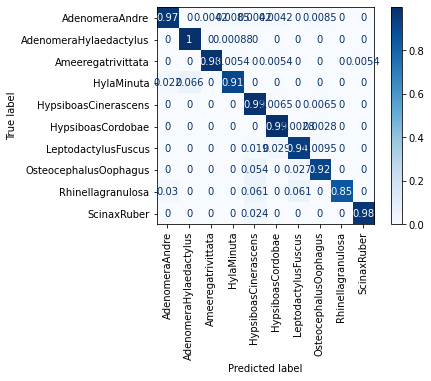

In [10]:
svc_clf=SVC()
svc_clf.fit(x_train,y_train[family])
plot_confusion_matrix(svc_clf,x_test,y_test[family],cmap=plt.cm.Blues,normalize='true',xticks_rotation="vertical")
svc_clf.fit(x_train,y_train[genus])
plot_confusion_matrix(svc_clf,x_test,y_test[genus],cmap=plt.cm.Blues,normalize='true',xticks_rotation="vertical")
svc_clf.fit(x_train,y_train[species])
plot_confusion_matrix(svc_clf,x_test,y_test[species],cmap=plt.cm.Blues,normalize='true',xticks_rotation="vertical")

###  II. SVM Classifier Hierarchical /৲¬
Our idea came from this inspirationnal drawing I made : 

                        📈
                        / \
                       📈 📈
                       /\  /\
                      📈📈📈📈


 #### Creating the pipeline to cluster them hierarchically

In [11]:
print("Classifying Families",'\n')
SVMclfGeneral=SVC()
SVMclfGeneral.fit(x_train,y_train[family])


SVMclfFamiliesSVM=[]
SVMclFamiliesLabels=[]

SVMclfGenusSVM=[]
SVMclfGenusLabels=[]

print("Classifying Genus : ",'\n')

for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    
    if len(np.unique(y_train[y_train[family]==label][genus]))>1:
        SVMclfTemp = SVC()
        SVMclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))

        SVMclFamiliesLabels.append(label)
        SVMclfFamiliesSVM.append(SVMclfTemp)
    else:
        genusTemp=np.unique(y_train[y_train[family]==label][genus])[0]
        print(genusTemp)
        SVMclFamiliesLabels.append(label)
        SVMclfFamiliesSVM.append(genusTemp)
    
SVMclfFamilies=dict(zip(SVMclFamiliesLabels,SVMclfFamiliesSVM))
print(SVMclfFamilies)

print("\nClassifying Species : ",'\n')

for label in np.unique(dataset[genus]):
    print("Classifying "+str(label))

    if len(np.unique(y_train[y_train[genus]==label][species]))>1:

        SVMclfTemp = SVC()
        SVMclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
        SVMclfGenusLabels.append(label)
        SVMclfGenusSVM.append(SVMclfTemp)
    else:
        
        specieTemp=np.unique(y_train[y_train[genus]==label][species])[0]
        
        SVMclfGenusLabels.append(label)
        SVMclfGenusSVM.append(specieTemp)

        
SVMclfGenus=dict(zip(SVMclfGenusLabels,SVMclfGenusSVM))

Classifying Families 

Classifying Genus :  

Classifying Bufonidae
Rhinella
Classifying Dendrobatidae
Ameerega
Classifying Hylidae
Classifying Leptodactylidae
{'Bufonidae': 'Rhinella', 'Dendrobatidae': 'Ameerega', 'Hylidae': SVC(), 'Leptodactylidae': SVC()}

Classifying Species :  

Classifying Adenomera
Classifying Ameerega
Classifying Dendropsophus
Classifying Hypsiboas
Classifying Leptodactylus
Classifying Osteocephalus
Classifying Rhinella
Classifying Scinax


#### Predicting results 🐸

In [12]:
y_predicted=pd.DataFrame(columns=y_test.columns[:-1])
display(y_predicted)

,Family,Genus,Species


In [13]:
y_predicted[family]=SVMclfGeneral.predict(x_test)

for label in np.unique(y_predicted[family]):
    
    x_testTemp=x_test[y_predicted[family]==label]
    x_testTempIndices=np.where(y_predicted[family]==label)[0]
    
    
    if type(SVMclfFamilies[label])!=str:
        
        y_predictedGenusTemp=SVMclfFamilies[label].predict(x_testTemp)
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
    else:

        y_predictedGenusTemp=[SVMclfFamilies[label] for i in x_testTempIndices]
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
for sublabel in np.unique(y_predicted[genus]):

    x_testTemp=x_test[y_predicted[genus]==sublabel]
    x_testTempIndices=np.where(y_predicted[genus]==sublabel)[0]

    if type(SVMclfGenus[sublabel])!=str:

        y_predictedSpecieTemp=SVMclfGenus[sublabel].predict(x_testTemp)
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp

    else:

        y_predictedSpecieTemp=[SVMclfGenus[sublabel] for i in x_testTempIndices]
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp
        

display(y_predicted)

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2370,Leptodactylidae,Adenomera,AdenomeraAndre
2371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2372,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2373,Hylidae,Hypsiboas,HypsiboasCordobae


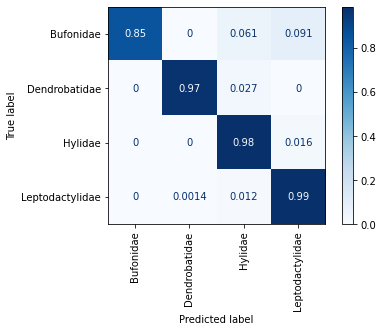

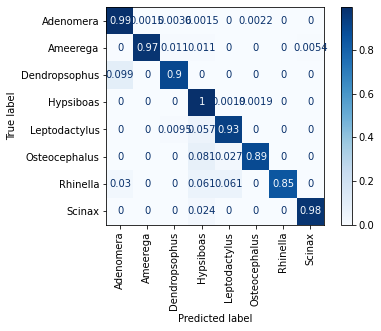

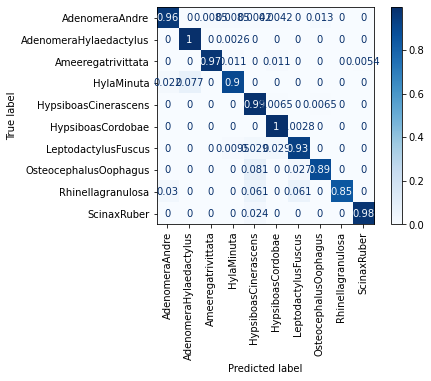

In [14]:
for label in labels[:-1]:
    
    cm=confusion_matrix(y_test[label],y_predicted[label],normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test[label]))
    disp = disp.plot(cmap=plt.cm.Blues,xticks_rotation="vertical")

#### Precision : Hierarchical

In [15]:
cm=confusion_matrix(y_test[species],y_predicted[species])
somme=0
for i in range(len(cm)):
    for j in range(len(cm)):
        if i==j:
            somme+=cm[i][j]
print('Accuracy for Hierarchical clustering= ',somme/cm.sum())

Accuracy for Hierarchical clustering=  0.9806315789473684


#### Precision : Standard

In [16]:
flat_SVC=SVC()
scores=cross_val_score(flat_SVC,dataset[features],dataset[species],cv=20)
print("Accuracy with specie Clustering directly",scores.mean())

Accuracy with specie Clustering directly 0.9779031259671929


###  III. KNN Classifier Independant /৲¬ 🪢 🪢

Accuracy with specie Clustering directly 0.9738714794181368


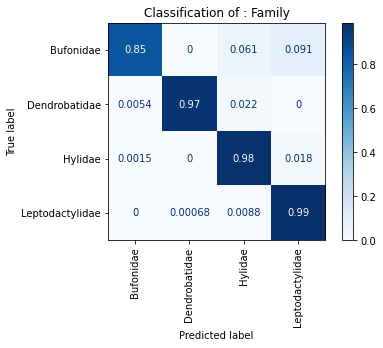

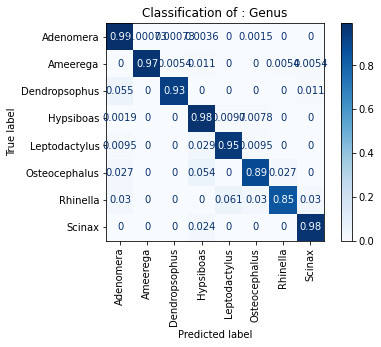

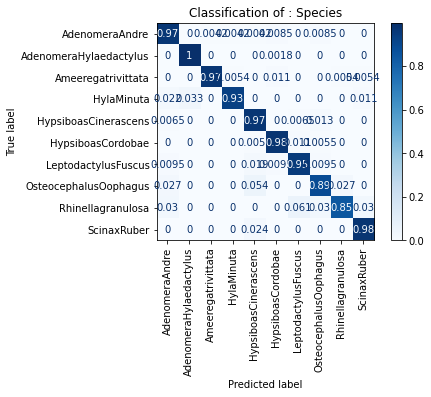

In [17]:
for label in labels[:-1]:
    x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                        dataset[label], 
                                                        test_size=0.33, 
                                                        random_state=42)



    Rfclf = KNeighborsClassifier(n_neighbors=7)
    Rfclf.fit(x_train, y_train)

    y_predicted=Rfclf.predict(x_test)
    
    

    
    confusion_matrix(y_test,y_predicted)
    disp=plot_confusion_matrix(Rfclf,x_test,y_test,cmap=plt.cm.Blues,
                                     normalize='true',labels=None,xticks_rotation="vertical")
    disp.ax_.set_title("Classification of : "+label)
    
plt.savefig("../images/confusionMatrixGeneral_"+str(label)+".png")

flat_SVC=KNeighborsClassifier(n_neighbors=7)
scores=cross_val_score(flat_SVC,dataset[features],dataset[species],cv=20)
print("Accuracy with specie Clustering directly",scores.mean())


###  II. KNN Classifier Hierarchical /৲¬
Our idea came from this inspirationnal drawing I made : 

                        🪢
                        / \
                       🪢 🪢
                       /\  /\
                      🪢🪢🪢🪢

In [18]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[labels], 
                                                    test_size=0.33, 
                                                    random_state=42)


print("Classifying Families",'\n')
RfclfGeneral=KNeighborsClassifier(n_neighbors=5)
RfclfGeneral.fit(x_train,y_train[family])


RfclfFamiliesRF=[]
RfclFamiliesLabels=[]

RfclfGenusRF=[]
RfclfGenusLabels=[]

print("Classifying Genus : ",'\n')

for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    
    RfclfTemp = KNeighborsClassifier(n_neighbors=5)
    RfclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))
    
    RfclFamiliesLabels.append(label)
    RfclfFamiliesRF.append(RfclfTemp)
    
RfclfFamilies=dict(zip(RfclFamiliesLabels,RfclfFamiliesRF))

print("\nClassifying Species : ",'\n')

for label in np.unique(dataset[genus]):
    print("Classifying "+str(label))
    
    RfclfTemp = KNeighborsClassifier(n_neighbors=5)
    RfclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
    
    RfclfGenusLabels.append(label)
    RfclfGenusRF.append(RfclfTemp)
    
RfclfGenus=dict(zip(RfclfGenusLabels,RfclfGenusRF))



Classifying Families 

Classifying Genus :  

Classifying Bufonidae
Classifying Dendrobatidae
Classifying Hylidae
Classifying Leptodactylidae

Classifying Species :  

Classifying Adenomera
Classifying Ameerega
Classifying Dendropsophus
Classifying Hypsiboas
Classifying Leptodactylus
Classifying Osteocephalus
Classifying Rhinella
Classifying Scinax


#### Predicting results 🐸

In [19]:
y_predicted=pd.DataFrame(columns=y_test.columns[:-1])
display(y_predicted)

,Family,Genus,Species


In [20]:
y_predicted[family]=RfclfGeneral.predict(x_test)

for label in np.unique(y_predicted[family]):
    
    x_testTemp=x_test[y_predicted[family]==label]
    x_testTempIndices=np.where(y_predicted[family]==label)[0]
    
    
    if type(RfclfFamilies[label])!=str:
        
        y_predictedGenusTemp=RfclfFamilies[label].predict(x_testTemp)
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
    else:

        y_predictedGenusTemp=[RfclfFamilies[label] for i in x_testTempIndices]
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
for sublabel in np.unique(y_predicted[genus]):

    x_testTemp=x_test[y_predicted[genus]==sublabel]
    x_testTempIndices=np.where(y_predicted[genus]==sublabel)[0]

    if type(RfclfGenus[sublabel])!=str:

        y_predictedSpecieTemp=RfclfGenus[sublabel].predict(x_testTemp)
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp

    else:

        y_predictedSpecieTemp=[RfclfGenus[sublabel] for i in x_testTempIndices]
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp
        

display(y_predicted)

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2370,Leptodactylidae,Adenomera,AdenomeraAndre
2371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2372,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2373,Hylidae,Hypsiboas,HypsiboasCordobae


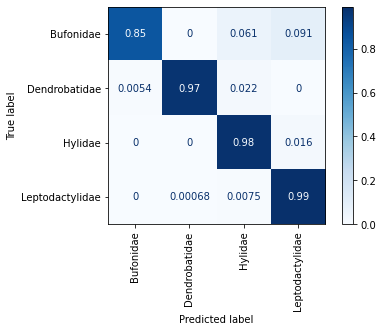

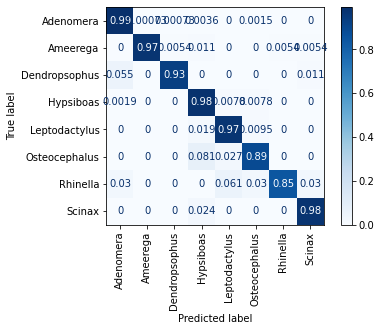

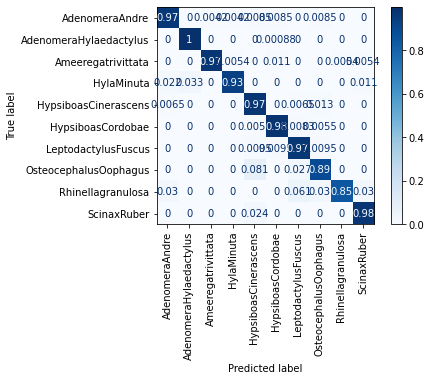

In [21]:
for label in labels[:-1]:
    
    cm=confusion_matrix(y_test[label],y_predicted[label],normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test[label]))
    disp = disp.plot(cmap=plt.cm.Blues,xticks_rotation="vertical")

In [23]:
cm=confusion_matrix(y_test[species],y_predicted[species])
somme=0
for i in range(len(cm)):
    for j in range(len(cm)):
        if i==j:
            somme+=cm[i][j]
print('Accuracy for Hierarchical clustering= ',somme/cm.sum())

Accuracy for Hierarchical clustering=  0.9814736842105263
